# 1.Understanding the Data

In [4]:
# Load the dataset
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Documents\python book\covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [34]:
# load required libraries/modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [ ]:
df.isna().sum()

# 2. Data Cleaning:

In [ ]:
#Handle missing values
for i in df:
    if df[i].dtypes=='object':
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)

df.isna().sum()


In [ ]:
df.columns

In [88]:
# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])

In [94]:
# Check for duplicates
print('Number of duplicates :',df.duplicated().sum())


Number of duplicates : 0


In [62]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


# 3 Descriptive Statistics 

In [5]:
# Summary statistics for categorical columns
cat=[]
con=[]
for i in df:
    if df[i].dtypes=='object' :
        cat.append(i)
    else:
        con.append(i)

df.describe()


for i in cat:
    print(df[i].describe())


for i in cat:
    print(df[i].value_counts())


count         306429
unique           494
top       05/29/2021
freq             765
Name: ObservationDate, dtype: object
count      228326
unique        736
top       Unknown
freq         4123
Name: Province/State, dtype: object
count     306429
unique       229
top       Russia
freq       30251
Name: Country/Region, dtype: object
count                  306429
unique                   1905
top       2021-04-02 15:13:53
freq                   239885
Name: Last Update, dtype: object
ObservationDate
05/29/2021    765
02/22/2021    765
02/24/2021    765
02/25/2021    765
02/26/2021    765
             ... 
01/26/2020     49
01/23/2020     48
01/25/2020     46
01/24/2020     43
01/22/2020     40
Name: count, Length: 494, dtype: int64
Province/State
Unknown                         4123
Amazonas                        1109
Diamond Princess cruise ship     924
Grand Princess                   882
Punjab                           708
                                ... 
Harrison County, KY     

# 4  Time Series Analysis

In [19]:
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_time 


,Confirmed,Deaths,Recovered
ObservationDate,,,
01/01/2021,84092619.0,1834675.0,47313005.0
01/02/2021,84718978.0,1843108.0,47614297.0
01/03/2021,85251774.0,1850449.0,47882779.0
01/04/2021,85805892.0,1860598.0,48173187.0
01/05/2021,86546014.0,1875953.0,48488548.0
...,...,...,...
12/27/2020,80912611.0,1771659.0,45717710.0
12/28/2020,81408934.0,1781415.0,46016136.0
12/29/2020,82073362.0,1796786.0,46369231.0


<Axes: xlabel='ObservationDate', ylabel='Deaths'>

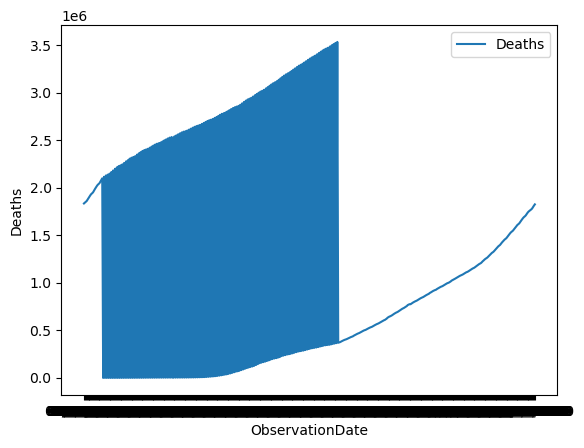

In [27]:

sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')

# 5. Geographical Analysis:

In [21]:
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})


<Axes: xlabel='Country/Region', ylabel='Confirmed'>

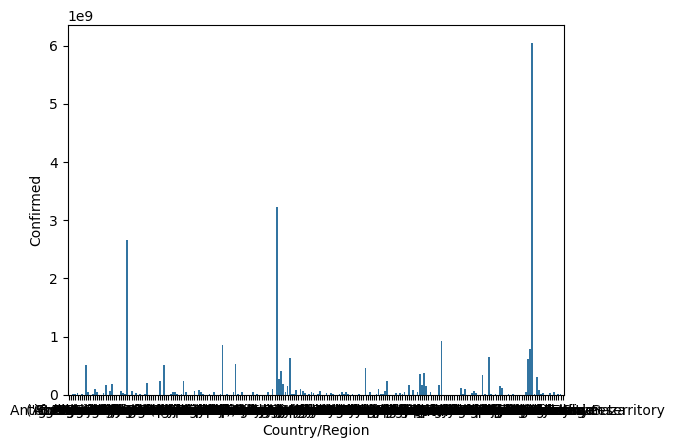

In [23]:
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)

# 6. Correlation Analysis

<Axes: >

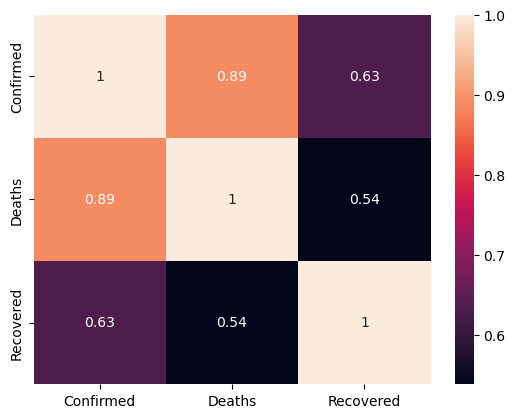

In [31]:
# Plot correlation on heat map
df.columns
c=df[['Confirmed', 'Deaths', 'Recovered']].corr()
sns.heatmap(c,annot=True)

# 7. Advanced Analysis:

In [18]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.
total_confirmed=df['Confirmed'].groupby(by=df['Country/Region']).sum()
total_recovered=df['Recovered'].groupby(by=df['Country/Region']).sum()
total_deaths=df['Deaths'].groupby(by=df['Country/Region']).sum()



In [96]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.
a=df.sort_values(by='Confirmed',ascending=False)
high_conf=a.head(1)
b=df.sort_values(by='Deaths',ascending=False)
high_deaths=b.head(1)
c=df.sort_values(by='Recovered',ascending=False)
high_recov=c.head(1)
print(a,b,c)

           SNo ObservationDate Province/State  Country/Region  \
298068  298069      05/19/2021            NaN          France   
297303  297304      05/18/2021            NaN          France   
296538  296539      05/17/2021            NaN          France   
295773  295774      05/16/2021            NaN          France   
295008  295009      05/15/2021            NaN          France   
...        ...             ...            ...             ...   
257404  257405      03/26/2021        Unknown        Colombia   
257406  257407      03/26/2021        Unknown           India   
257408  257409      03/26/2021        Unknown  Mainland China   
257409  257410      03/26/2021        Unknown          Mexico   
147524  147525      11/02/2020        Unknown        Colombia   

                Last Update  Confirmed    Deaths  Recovered  
298068  2021-05-20 04:21:05  5863138.0  107390.0   324444.0  
297303  2021-05-19 04:20:42  5845010.0  107256.0   323205.0  
296538  2021-05-18 04:20:33  5829

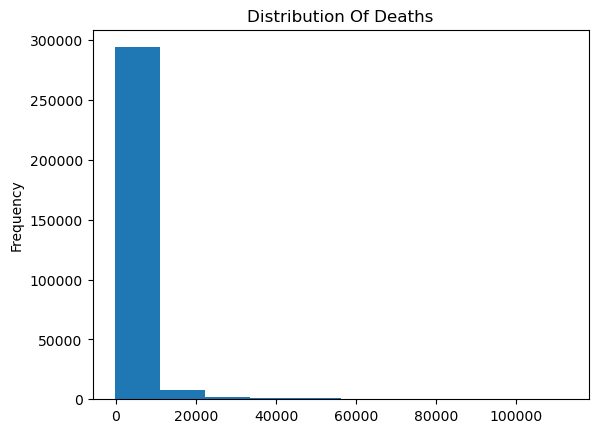

In [35]:
# Visualize the distribution of deaths using bar chart
plt.hist(df['Deaths'],bins=10)
plt.title('Distribution Of Deaths')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Frequency'>

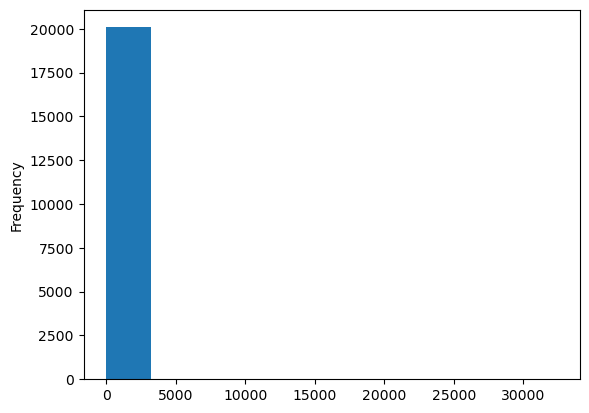

In [74]:
df['Deaths'].value_counts().plot(kind='hist')
